In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Homework 8
## Student: Eugeniu Vezeteu - 886240

### case a) 

We have the model $\dot{x} = a*x+u$, with $x(0) = 3$ and $a = -\frac{1}{2}$, where $u=u(t)$.\\
Using integrating factor $e^{-at}$, results:\\

$\frac{d}{dt}e^{-at}x(t) = e^{-at}\dot{x(x)} - e^{-at}ax(t)$

We multiply each side with integrating factor:

$ e^{-at}\dot{x(t)} - e^{-at}ax(t) = e^{-at}u(t)$
resulting in:\\
$\frac{d}{dt}e^{-at}x(t) = e^{-at}u(t)$
We take the integral in both sides:

$\int_{t_{n-1}}^{t_n}\frac{d}{dt}[e^{-at}x(t)] dt = \int_{t_{n-1}}^{t_n} e^{-at} u(t) dt$
which results in:

$[e^{-at}x(t)]_{t = t_{n-1}}^{t_n} = \int_{t_{n-1}}^{t_n} e^{-at} u(t) dt$

$e^{-at_n}x(t_n) - e^{-at_{n-1}}x(t_{n-1}) = \int_{t_{n-1}}^{t_n} e^{-at} u(t) dt$

\\
By multiplying with $e^{at_n}$, we can solve for $x(t_n)$.\\

which is:
\\
$$ x(t_n) = e^{at_n-at_{n-1}}x(t_{n-1}) + e^{at_n} \int_{t_{n-1}}^{t_n} e^{-at} u(t) dt = $$
$$ x(t_n) = e^{a \Delta t}x(t_{n-1}) + \int_{t_{n-1}}^{t_n} e^{a(t_n-t)}dt * u(t)  $$
since we assume u(t) constant between 2 consecutive timsteps (ZOH).

In [53]:
dt = .1
t = np.linspace(0.,10.,100,endpoint=True)
u = np.ones_like(t)
a = -1/2
x_init = 3

### case b)

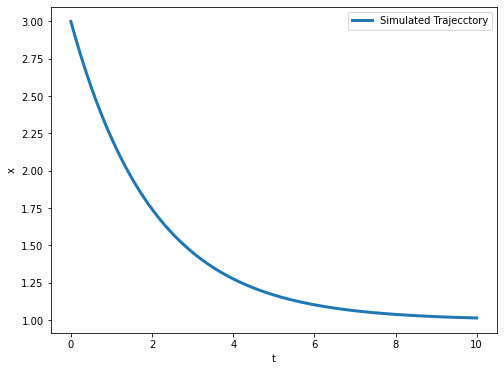

In [64]:
def simulate_trajectory():
    x_res = np.zeros_like(t)
    x_res[0] = x_init
    for i in range(x_res.shape[0]-1):
        x_res[i+1] = np.exp(a*dt)*x_res[i] + ((1-np.exp(a*dt))*u[i])
    return x_res

x = simulate_trajectory()

plt.figure(figsize=(8,6))
plt.plot(t,x,label='Simulated Trajecctory', linewidth=3)
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

### case c) with ODE

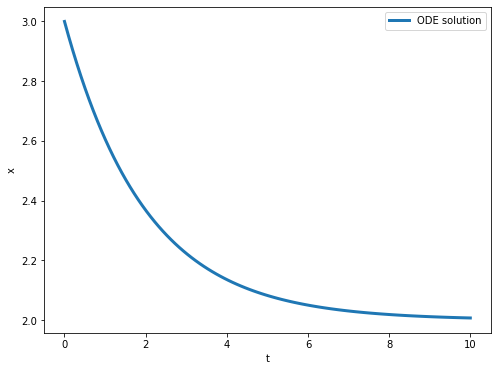

In [61]:
from scipy.integrate import odeint
# function that returns dx/dt
def model(x,t):
    u = 1
    dxdt = a*x + u
    return dxdt

# solve ODE
x_ode = odeint(model,x_init,t)

plt.figure(figsize=(8,6))
plt.plot(t,x_ode,label='ODE solution',linewidth=3)
plt.ylabel('x')
plt.xlabel('t')
plt.legend()
plt.show()